**기본 Markdown**

```Headers```
```
# Hello markdown1
## Hello markdown2
### Hello markdown3
#### Hello markdown4
```

```Bullet Point: *, -```
* python 2.7
- python 2.7

```Emphasis```
```python
s = "Python syntax highlighting"
print s
def add(a, b):
    return a + b
```

```Quotes```
> Blockquotes starts

```Italic: *```
- This is *python*

```Bold: **, __```
- This is **python**
- This is __python__

```Link: [] ()```
- [python webpage](https://www.python.org)

```Local Image: ![]()```
- ![python image](00_Images/python-logo.png)

```Web Image: ![]()```
- ![python image2](https://www.raspberrypi.org/documentation/usage/python/images/python-logo.png)

# SQL 기초문법의 이해

## MySQL Workbench 사용법

<div class="alert alert-block alert-success">
<font color="blue" size="4em">2.1 MySQL 설치 - 실습1</font><br>
   1. sudo apt-get update<br>
   2. sudo apt-get install mysql-server<br>
   3. mysql_secure_installation<br>
      - 비밀번호 설정 필요<br>
      - 참고: 만약 vi 명령이 없다면, 다음과 같이 vi 설치 및 사용법 숙지<br>
        - sudo apt-get install vim<br>
   3. sudo vim /etc/mysql/mysql.conf.d/mysqld.cnf <br>
     - 다음 설정을 [mysqld] 에 추가<br>
       1. mysql 원격 접속 허용<br>
          - bind-address 0.0.0.0 로 변경<br>
       2. mysql 한글 설정 추가<br>
          - collation-server = utf8_unicode_ci<br>
          - character-set-server = utf8<br>
          - skip-character-set-client-handshake<br>
   4. sudo service mysql start<br>
     - mysql 서비스 시작<br>
 참고:
 <pre>
 Usage: /etc/init.d/mysql start|stop|restart|status
 </pre>
 
   5. 모든 호스트에서 mysql 접속 허용하기<br>
 
 <pre>
 # mysql -u root -p 후 비밀번호 입력
 mysql> use mysql;
 mysql> GRANT ALL PRIVILEGES ON *.* to 'root'@'%' IDENTIFIED BY 'korea123';
 mysql> flush privileges;
 mysql> exit
 # sudo service mysql restart
 </pre>
 </div>

```참고1: use mysql;```
use 데이터베이스명; 으로 mysql 데이터베이스는 mysql 설정을 저장하고 있는 데이터베이스임. 해당 데이터베이스에서 작업을 하겠다는 의미임.

```참고2: mysql 접속 허용 관련 설정 (5장 참고)```
```
1) 로컬에서만 접속 허용
mysql> GRANT ALL PRIVILEGES ON DATABASE.TABLE to 'root'@localhost identified by "korea123";
2) 특정 호스트에만 접속 허용
mysql> GRANT ALL PRIVILEGES ON DATABASE.TABLE to 'root'@www.blim.co.kr identified by "korea123";
3) 모든 호스트에서 접속 허용
mysql> GRANT ALL PRIVILEGES ON DATABASE.TABLE to 'root'@'%' identified by "korea123";
```

```옵션 상세```
```
1) ALL – 모든 권한 / SELECT, UPDATE – 조회, 수정 권한등으로 권한 제한 가능
    예) GRANT INSERT,UPDATE,SELECT ON *.* TO 'username'@'localhost' IDENTIFIED BY '비밀번호';
2) database.table – 특정 데이터베이스에 특정 테이블에만 권한을 줄 수 있음 / *.* – 모든 데이터베이스에 모든 테이블 권한을 가짐
3) root – 계정명
4) korea123 – 계정 비밀번호
```

```참고3: flush privileges; (5장 참고)```
- user, db 같은 grant table을 INSERT, UPDATE 등을 써서 직접 데이터 입력/수정을 할 경우, grant tables를 다시 읽어야 권한 설정이 적용됨.
- 서버를 재기동하지 않고, grant table을 새로 읽으라는 명령이 flush privileges 이지만, INSERT, UPDATE 가 아닌 GRANT 명령을 사용했을 경우에는 해당 명령 생략 가능 (하지만 확실하게 하기 위해 일반적으로 사용)

<div class="alert alert-block alert-success">
<font color="blue" size="4em">2.2 mysql workbench 설치 - 실습2</font><br>
 - mysql 서버에 접속해서 SQL 명령을 통해, mysql 데이터베이스 조회 및 조작을 할 수 있는 클라이언트 소프트웨어<br>
 - 프로그래머들은 mysql workbench를 사용하기보다는 직접 CLI(Command line interface)를 사용하는 경우가 많음<br>
 - workbench 사용법 및 CLI 사용법 둘다 익혀둘 것<br>
 <br>
 - 다운로드 및 설치: <br>
   - https://dev.mysql.com/downloads/workbench/ 에서 workbench 다운로드<br>
   - 설치 및 mysql 서버 연결 참고, 상세 인터페이스 (https://help.iwinv.kr/manual/read.html?idx=349)<br>
 <br>
 - docker에 mysql 서버를 설치한 경우는 3306 mysql 포트 추가 오픈이 필요함<br>
   - 추가 포트 오픈 방법 <br>
 http://1004jonghee.tistory.com/entry/%EC%BB%A8%ED%85%8C%EC%9D%B4%EB%84%88-%EC%82%AD%EC%A0%9C%ED%95%98%EC%A7%80-%EC%95%8A%EA%B3%A0-%ED%8F%AC%ED%8A%B8-%EC%B6%94%EA%B0%80%ED%95%98%EA%B8%B0![image.png](attachment:image.png)
   <br><br>
   - 예: commit 후 새로운 image로 기존 옵션에 -p 3306:3306 추가해서 docker 실행 <br>
     - docker pull jhleeroot/dave_ubuntu:1.0.1<br>
     - docker run -Pit -i -t -p 8888:8888 -p 8787:8787 -p 8022:22 -p 3306:3306 --name dave_ubuntu jhleeroot/dave_ubuntu:1.0.1 /bin/bash<br>
     - docker ps -a<br>
     - docker restart dave_ubuntu<br>
     - docker attach dave_ubuntu<br>
   - docker 안에서 mysql 처음 시작시 다음 명령 실행<br>
     - sudo usermod -d /var/lib/mysql/ mysql<br>
     - sudo chown -R mysql:mysql /var/lib/mysql /var/run/mysqld<br>
   - sudo service mysql restart
   <br><br>
   - 윈도우10의 경우 workbench 연결 설정의 Hostname을 127.0.0.1 로 하면 접속 성공<br>
   - 맥의 경우 workbench 연결 설정의 Hostname을 0.0.0.0 으로 하면 접속 성공
 </div>
 

<pre>
# mysql -h host -u user -p [password] dbname
  host: mysql 서버 주소 (관련 옵션 사용 안하면, 현재 PC)
  user: mysql ID
  password: mysql ID의 암호

예)
  # mysql -u root -p
  현재 PC에 root ID로 별도 데이터베이스를 지정하지 않고, 접속
</pre>

### DB, 테이블 목록 보기
1. 터미널 접속
2. 경로 이동
``` 
cd/ usr/local/mysql/bin
./mysql -u root -p
```
3. mysql 접속
```
# mysql -u root -p
# show databases;
# use mysql;
# show tables;
# use information_schema;
# show tables;
# exit
```

## DDL(Data Definition Language): DB와 Table 관리
1. DB 생성 / 목록 보기 / 사용 / 삭제
2. TABLE 생성 / 조회 / 삭제 / 구조 수정

### [CREATE] 데이터베이스 생성
```mysql
CREATE DATABASE dbname;
```
### [SHOW] 데이터베이스 목록 보기
```mysql
SHOW DATABASES;
```
### [USE] dbname 데이터베이스 사용 시
```mysql
USE dbname;
```
### [DROP] dbname 데이터베이스 삭제
```mysql
DROP DATABASE [IF EXISTS] dbname;
```

### [CREATE] 테이블 생성 
- 순서: DB 생성(CREATE) > DB 사용(USE) > Table 생성(CREATE)
```mysql
CREATE TABLE 테이블명 (
    컬럼명 데이터타입,
    컬럼명 데이터타입,
    .
    .
    PRIMARY KEY() #기존 컬럼에서 지정
);
```


**데이터 옵션**
- UNSIGNED: Primary Key (값 필요x)
- NOT NULL: Primary Key (디폴트)
- AUTO_INCREMENT: unique data (이전보다 1씩 증가)
- (예시) ```MYKEY INT UNSIGNED NOT NULL AUTO_INCREMENT```


**1) 숫자형 데이터 타입**
``` 
id 데이터타입 [UNSIGNED] [NOT NULL] [AUTO_INCREMENT]
```

- id: 컬럼명 / 가능한 영어 소문자 중심으로
- 데이터타입: 
    - ```TINYINT```: 정수형 데이터 타입(1byte) / -128-127 OR 0-255
    - ```SMALLINT```: 정수형 데이터 타입(2byte) / -32768-32767 OR 0-65536
    - ```MEDIUMINT```: 정수형 데이터 타입(3byte) / -8388608-8388607 OR 0-16777215
    - ```INT```: 정수형 데이터 타입(4byte) / -2147473648-2147483647 OR 0-429496729
    - ```BIGINT```: 정수형 데이터 타입(8byte) / 무제한수 표현 가능
    - ```FLOAT```: 부동 소수형 데이터 타입(4byte)
    - ```DECIMAL```: 고정 소수형 데이터 타입(길이,1byte) / ex. DECIMAL(5,2) = 12345.67
    - ```DOUBLE```: 부동 소수형 데이터 타입(8byte)
- UNSIGNED (옵션): 0부터 시작(INT)
- NOT NULL
- AUTO_INCREMENT: 해당 컬럼은 양의 정수만 등록 가능 (only 1개 컬럼)


**2) 문자형 데이터 타입**
```
name 데이터타입
```
name 데이터타입
- name: 컬럼명 / 가능한 영어 소문자 중심으로
- 데이터타입
    - ```CHAR(n)```: 고정길이 데이터 타입 (n <= 255 byte)
    - ```VARCHAR(n)```: 가변길이 데이터타입 (n <= 65535 byte)
        - VARCHAR(2) = T OR F
    - ```TINYTEXT(n)```: 문자열 데이터 (n <= 255)
    - ```TEXT(n)```: 문자열 데이터 (n <= 65535)
    - ```MEDIUMTEXT(n)```: 문자열 데이터 (n <= 16777215)
    - ```LONGTEXT(n)```: 문자열 데이터 (n <= 4294967295)
   
   
**3) 시간형 데이터 타입**
```
ts 데이터타입
```
- ts: 컬럼명 / 가능한 영어 소문자 중심으로
- 데이터타입
    - ```DATE```: YYYY-MM-DD 형태의 기간 표현 데이터 타입 (3byte)
    - ```TIME```: YYYY-MM-DD hh:mm:ss 형태 (1001-01-01 00:00:00 - 9999-12-31 23:59:59)
    - ```TIMESTAMP```: 1970-01-01 00:00:00 이후부터 시스템 현재시간까지의 지난 시간을 초로 환산 -> 숫자로 표현
    - ```YEAR```: Year(n) 형식 / n은 2(70-69)와 4(1970-2069)지정 가능
    
    
**Primary Key 지정**
- Primary Key로 지정되는 컬럼은 주로 NOT NULL, AUTO_INCREMENT 선언 되는 경우 많음
```mysql
CREATE TABLE hari (
    id INT UNSIGNED NOT NULL AUTO_INCREMENT,
    PRIMARY KEY(id)
);
```


### [SHOW] 테이블 조회
테이블 확인하기
```mysql
desc mytable;
```

테이블 조회
```mysql
SHOW TABLES;
```

### [DROP] 테이블 삭제 (DROP TABLE ...)
```mysql
DROP TABLE [IF EXISTS] 테이블명;
```

### [ALTER TABLE ...] 테이블 구조 수정: 컬럼 추가/변경/삭제
#### 컬럼 추가
```mysql
ALTER TABLE [테이블명] ADD COLUMN [추가할 컬럼명][추가할 컬럼 데이터타입]
```
#### 컬럼 타입 변경
```mysql
ALTER TABLE [테이블명] MODIFY COLUMN [변경할 컬럼명][변경할 컬럼 데이터타입]
```
#### 컬럼 이름+타입 변경
```mysql
ALTER TABLE [테이블명] CHANGE COLUMN [기존 컬럼명][변경할 컬럼명][변경할 컬럼 데이터타입]
```
#### 컬럼 삭제
```mysql
ALTER TABLE [테이블명] DROP COLUMN [삭제할 컬럼명]
```

## DML(Data Manipulation Language): 데이터 관리 (CRUD)
- CRUD (CREATE, READ, UPDATE, DELETE) 
- = (INSERT, SELECT, UPDATE, DELETE)

### [INSERT INTO ...] 데이터 생성 
#### 전체 컬럼에 대응하는 값 모두 넣기
```mysql
INSERT INTO [테이블명] VALUES(값1, 값2, ...);
```

#### 특정 컬럼에 대응하는 값만 넣기 (미지정 컬럼 = Default값 OR NULL값)
```mysql
INSERT INTO [테이블명] (컬럼1,컬럼2, ...) VALUES(값1, 값2, ...);
```

### [SELECT] 데이터 읽기(검색) 
#### A) 전체 컬럼의 데이터 모두 읽기: ```SELECT * FROM ...```
```mysql
SELECT * FROM 테이블명;
```
#### A) 특정 컬럼의 데이터만 읽기: ```SELECT ..., ... FROM ...```
```mysql
SELECT 컬럼1, 컬럼2, ... FROM 테이블명;
```
#### A) 특정 컬럼의 데이터만 읽기 (컬럼명 다르게 표시): ```SELECT ... AS ... FROM ...```
```mysql
SELECT 컬럼1 AS 바꾼컬럼1, 컬럼2 AS 바꾼컬럼2 FROM 테이블명;
```
#### B) 정렬: ```ORDER BY```
```mysql
SELECT * FROM 테이블명 ORDER BY 정렬기준_컬럼명 DESC;
SELECT * 컬럼1, 컬럼2 FROM 테이블명 ORDER BY 정렬기준_컬럼명 ASC;
```
#### B) 조건 & 논리(비교) 연산자: ```WHERE ... OR/AND ...```
```mysql
SELECT * FROM 테이블명 WHERE [ > ];
SELECT * FROM 테이블명 WHERE [ = ];
SELECT * FROM 테이블명 WHERE [ < ];

SELECT * FROM 테이블명 WHERE [ > ] OR [ = ];
SELECT * FROM 테이블명 WHERE [ > ] AND [ = ];
```
#### C) 조건 & 부분 일치: ```WHERE ... LIKE ...```
```mysql
SELECT * FROM 테이블명 WHERE [ > ] LIKE 'O%';
SELECT * FROM 테이블명 WHERE [ > ] LIKE '%O';
SELECT * FROM 테이블명 WHERE [ > ] LIKE '%O%';
SELECT * FROM 테이블명 WHERE [ > ] LIKE 'O__';
SELECT * FROM 테이블명 WHERE [ > ] LIKE '%O __';
SELECT * FROM 테이블명 WHERE [ > ] LIKE '%__O%';
```
#### D) 일부 가져오기: ```LIMIT```
- 주의: 100번째부터 10개만 가져오고 싶을 때? LIMIT 100,10(X) / LIMIT 99,10(O)
```mysql
SELECT * FROM 테이블명 LIMIT 가져올개수;
SELECT * FROM 테이블명 LIMIT 시작할순서,가져올개수;
```
#### E) 조합: ```SELECT > FROM > WHERE > GROUP BY > ORDER BY > LIMIT```
```mysql
SELECT 컬럼1, 컬럼2 FROM 테이블명 WHERE [ > ] AND [] LIKE '%O%' ORDER BY [] DESC LIMIT 가져올개수;
```

### [UPDATE] 데이터 수정
- 주의: 컬럼값 통째로 바꾸면 ERROR! (통상적으로 WHERE과 같이 씀)
#### 조건 & 수정 (특정 컬럼): ```UPDATE ... SET ...```
```mysql
UPDATE 테이블명 SET 수정하려는_컬럼명 = '수정하려는_값' WHERE 특정컬럼 = '값';
```
#### 조건 & 수정 (다수 컬럼): ```UPDATE ... SET ... , ```
```mysql
UPDATE 테이블명 SET 수정하려는_컬럼명1 = '수정하려는_값1', 수정하려는_컬럼명2 = '수정하려는_값2' WHERE 특정컬럼 < '값';
```

### [DELETE] 데이터 삭제
- 통상적으로 WHERE과 같이 씀
#### 삭제 (특정 조건)
```mysql
DELETE FROM 테이블명 WHERE 특정컬럼 = '값';
```
#### 삭제 (모든 데이터)
```mysql
DELETE FROM 테이블명;
```

## DCL(Data Control Language): 데이터 핸들링 권한 / 데이터 무결성 처리

### 사용자 관련
[terminal 모드 접속](http://localhost:8888/notebooks/YCC_SQL/ch1-4_mysql_basic.ipynb)
#### mysql 사용자 확인
```
mysql -u root -p
use mysql;
select * from user;
```
#### mysql 사용자 추가
```
mysql -u root -p
use mysql;
```
- 로컬에서만 접속 가능한 user_id 생성
```
create user '만들고싶은_id'@localhost identified by '비밀번호';
```
- 모든 호스트에서 접속 가능한 user_id 생성
```
create user '만들고싶은_id'@'%' identified by '비밀번호';
```

#### mysql 사용자 비밀번호 변경
```
select host, user from user;
SET PASSWORD FOR '만들고싶은_id'@'%' = '신규비밀번호';
exit;
```

#### mysql 사용자 삭제
```
mysql -u root -p
use mysql;
drop user '만들고싶은_id'@'%';
select host, user from user;
exit;
```
- 에러 발생
```
mysql -u 만들고싶은_ID -p
```

### 접속허용 관련
[terminal 모드 접속](http://localhost:8888/notebooks/YCC_SQL/ch1-4_mysql_basic.ipynb)
#### 현재 부여 권한 확인
```
SHOW GRANTS for 아이디;
```
#### 접속허용
- 로컬만 허용
    - ALL: 모든 권한 / INSERT,UPDATE,SELECT,DELETE: 권한 제한
    - DATABASE.TABLE: 특정DB의 특정Table 권한 / *.*: 모든DB의 모든Table 권한
```
GRANT ALL ON DATABASE.TABLE to 'root'@localhost;
GRANT INSERT, UPDATE, SELECT ON *.* to 'root'@localhost;
```
- 특정 권한만 허용
```
GRANT SELECT, UPDATE ON DATABASE.TABLE to 'root'@localhost;
```

# SQL 기본문법
## 기본 함수
### COUNT( )
```mysql
SELECT COUNT(*) FROM people #(전체 row 수) 
SELECT COUNT(1) FROM people
```
```mysql
SELECT COUNT(age) FROM people #(특정 field 값이 있는 row 수)
```
### SUM( ), AVT( ), MAX( ), MIN( )
```mysql
SELECT AVG(age) FROM people
```
### GROUP BY( )
그룹별 ...
```mysql
SELECT AVG(age) FROM people GROUP BY gender
SELECT AVG(age) FROM people WHERE ... GROUP BY gender
```
### DISTINCT( )
중복값 미출력
```mysql
SELECT DISTINCT gender FROM people
```

### AS( )
```mysql
SELECT COUNT(*) AS total_count FROM people
SELECT COUNT(*) total_count FROM people GROUP BY ...
```
### 복합검색
```mysql
SELECT provider, COUNT(dis_pirce) FROM items 
GROUP BY provider
ORDER BY COUNT(*) DESC;
```

## 집계 함수
### HAVING( ) & GROUP BY( )
```mysql
SELECT provider, COUNT(*) FROM items
GROUP BY provider
HAVING COUNT(*) >= 100;
```
### 복합검색
```mysql
SELECT provider, COUNT(*) FROM items
WHERE provider != '스마일배송' and '' #스마일배송, N/A 제외
GROUP BY provider
HAVING COUNT(*) > 100
ORDER BY COUNT(*) DESC; #갯수 순 정렬
```

## JOIN 구문
- JOIN이란? 2개 이상의 테이블로부터 필요한 데이터를 연결 > 하나의 구조로 결합시키는 연산
- JOIN의 종류
    1. ```INNER JOIN``` (일반적인 JOIN, 교집합): 두 테이블에 해당 필드값이 매칭되는 (두 테이블의 모든 필드로 구성된) 레코드만 가져옴
    2. ```OUTER JOIN``` (합집합)
        - ```LEFT JOIN```: 왼쪽 테이블에서 모든 레코드와 함께, 오른쪽 테이블에 왼쪽 테이블 레코드와 매칭되는 레코드를 붙여서 가져옴
        - ```RIGHT JOIN```: 오른쪽 테이블에서 모든 레코드와 함께, 왼쪽 테이블에 왼쪽 테이블 레코드와 매칭되는 레코드를 붙여서 가져옴

### INNER JOIN
ON절의 조건이 일치하는 결과(교집합)만 출력
```mysql
SELECT * FROM items 
INNER JOIN ranking ON ranking.item_code = items.item_code
WHERE ranking.main_category = "ALL"
```
테이블명 바꿔 보이기
```mysql
SELECT * FROM items a
INNER JOIN ranking b ON a.item_code = b.item_code
WHERE b.main_category = "ALL"
```
![image-2.png](attachment:image-2.png)

### OUTER JOIN
#### LEFT OUTER JOIN
```mysql
SELECT * FROM customer_table C 
LEFT OUTER JOIN order_table O ON C.customer_id = O.customer_id
```
![image.png](attachment:image.png)

#### RIGHT OUTER JOIN
```mysql
SELECT * FROM customer_table C
RIGHT OUTER JOIN order_table O ON C.customer_id = O.customer_id
```
![image-2.png](attachment:image-2.png)

## 서브쿼리
- SQL문 안에서 괄호() 를 사용해서, 서브쿼리문을 추가
- 검색 범위(테이블 중 필요한 부분만 먼저 가져오도록)를 좁히는 기능에 주로 사용
    - 대부분의 서브쿼리(Sub Query) 는 JOIN 문으로 처리가 가능

### JOIN문과 SubQuery문 비교
1. JOIN
```mysql
SELECT title FROM items
INNER JOIN ranking ON items.item_code = ranking.item_code
WHERE ranking.sub_category = "여성신발";
```
2. SubQuery
```mysql
SELECT title FROM items
WHERE item_code IN
    (SELECT item_code FROM ranking WHERE sub_category = '여성신발')
```
**다양한 서브쿼리문**
- 비교
```sql
  SELECT category_id, COUNT(*) AS film_count FROM film_category
  WHERE film_category.category_id >
      (SELECT category.category_id FROM category WHERE category.name = 'Comedy') #record값 하나일 때만 가능
  GROUP BY film_category.category_id
```
- FROM절
```sql
  SELECT
  a, b, c
  FROM
  (SELECT * FROM  atoz_table)
```

# SQL 심화문법

## 외래키 (Foreign Key)
두 테이블 사이에 관계를 선언해서, 데이터의 무결성을 보장

# pymysql 모듈

## pymysql 라이브러리 설치
### pymysql 모듈 
import pymysql

### [pymysql.connect( )] mysql 연결
```
db = pymysql.connect(host='localhost', port=3306, 
                user='root', passwd='alswl!@45', db='ecommerce', 
                charset='utf8')
```

- ```localhost``` = 자기자신 가리키는 주소 = 자기pc 접속
- ```port```: 외부에서 접속시; 프로그램에 대한 주소 (mysql은 항상 3306)
- ```utf8```: 유니코드로 저장 >> 한글데이터 잘 나타내줌

### [.cursor( )] 명령 받을 수 있는 상태로 명명
```
ecommerce = db.cursor()
```

### table 만들기
```
sql = """
    CREATE TABLE product (
        PRODUCT_CODE VARCHAR(20) NOT NULL,
        TITLE VARCHAR(200) NOT NULL,
        ORI_PRICE INT,
        DISCOUNT_PRICE INT,
        DISCOUNT_PERCENT INT,
        DELIVERY VARCHAR(2),
        PRIMARY KEY(PRODUCT_CODE)
    );
"""
```

### [.execute( )] table 실행
```
ecommerce.execute(sql)
```

### [.commit( )] 완전한 데이터 변환 
connect한 db에 반영
```
db.commit()
```
### [.close( )] db 연결 닫기 
```
db.close()
```

## pandas & pymysql
### read_sql()
#### 모든 테이블 보기
```
SQL = "SHOW TABLES" #명령문
df = pd.read_sql(SQL, db) #위에서 연결한 DB
df
```
#### 특정 테이블의 데이터 보기
```index=False```일 경우, csv파일 저장시 맨앞에 붙는 번호 사라짐!
```
SQL = "SELECT * FROM students" #명령문
df = pd.read_sql(SQL, db) #특정 테이블의 모든 데이터
df.to_csv('students.csv' sep=',', index=False, encoding='utf-8') #해당 디렉토리에 csv 파일 생성
df
```

### Foreign Key 기반 데이터 연결
- ```데이터 추가``` Foreign Key 기반으로 특정 테이블이 다른 테이블로부터 데이터 가져오고자 할 때, 설정한 데이터가 다른 테이블에 없으면 ERROR!
- ```데이터 삭제``` 특정 테이블이 Foreign Key로 연결된 다른 테이블과 연결되어 있는 데이터 삭제하고자 할 때, ERROR!

## ⭐️ 코드 패턴 

### 테이블 만들기
- 참고: 한글 처리에 문제가 있을 경우, DB, TABLE 에 DEFAULT CHARSET=utf8 COLLATE=utf8_bin 옵션을 모두 추가해서 실행
```sql
    CREATE DATABASE bestproducts DEFAULT CHARSET=utf8 COLLATE=utf8_bin; 
    CREATE TABLE tablename(field definitions) DEFAULT CHARSET=utf8 COLLATE=utf8_bin;
```

In [ ]:
# 1. 라이브러리 가져오기
import pymysql

# 2. 접속하기
db = pymysql.connect(host='localhost', port=3306, 
                     user='root', passwd='alswl!@45', db='ecommerce', 
                     charset='utf8')

# 3. 커서 가져오기
cursor = db.cursor()

# 4. SQL 구문 만들기 (CRUD) --> SQL문법대로 따서 붙이면 됌!
sql = '''
    CREATE TABLE product (
        PRODUCT_CODE VARCHAR(20) NOT NULL,
        TITLE VARCHAR(200) NOT NULL,
        ORI_PRICE INT,
        DISCOUNT_PRICE INT,
        DISCOUNT_PERCENT INT,
        DELIVERY VARCHAR(2),
        PRIMARY KEY(PRODUCT_CODE)
    );
'''

# 5. SQL 구문 실행하기
cursor.execute(sql)

# 6. DB에 Complete 하기
db.commit()

# 7. DB 연결 닫기
db.close()

### 테이블에 데이터 추가하기

In [ ]:
cursor = db.cursor()
SQL_QUERY = "INSERT INTO buyTbl (userID, prodName, groupName, price, amount) VALUES('STJ', '운동화', '의류', 30, 2);"
cursor.execute(SQL_QUERY)
db.commit()

### 테이블에서 데이터 삭제하기

In [ ]:
SQL_QUERY = "DELETE FROM userTble WHERE userID = 'STJ'"
cursor.execute(SQL_QUERY)
db.commit()

## ⭐️ 코드 패턴 with 크롤링
### 크롤링 코드

In [ ]:
# 1. 라이브러리 가져오기
import requests
from bs4 import BeautifulSoup

# 2. 웹사이트 내 콘텐츠 크롤링하기
res = requests.get('http://corners.gmarket.co.kr/Bestsellers')
soup = BeautifulSoup(res.content, 'html.parser')
    
#3-1. 출력 결과 깔끔하게 정리하기
def get_category(category_link, category_name):
    print (category_link, category_name)
    res = requests.get(category_link)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    sub_categories = soup.select('div.navi.group ul li a')
    for sub_category in sub_categories:
        print (category_link, category_name, sub_category.get_text(), 'http://corners.gmarket.co.kr/' + sub_category['href'])

#3-2. 데이터 parsing하기
categories = soup.select('div.gbest-cate ul.by-group li a')
for category in categories:
    get_category('http://corners.gmarket.co.kr/' + category['href'], category.get_text()) #함수로 미리 정의

# 다른 경로에 있는 파일 MySQL에 넣는 방법
## Textedit - Terminal
### Textedit - CSV 파일 만들기
```
Name, Gender, Birth, English #column
'A', 'man', '1971-08-02', 91 #row
```
### Terminal - MySQL 파일 불러오기
#### 1) 터미널 접속
```
cd /usr/local/mysql
cd bin
ls 
./mysql -u root -p
```
#### 2) 파일 가져오기 (확인용)
```
SOURCE /Users/mj/SQL/ch5_sql_data_file/students.sql #주소넣기
use student_mgmt;
show tables;
select * from students;
```
#### 3) [LOAD DATA INFILE ... INTO TABLE] 파일 MySQL에 넣기 
현업용이고, 웬만하면 프로그램이나 workbench 이용할 것!
```
LOAD DATA INFILE '/Users/mj/SQL/ch5_sql_data_file/test2.csv' INTO TABLE student_mgmt.students(name, gender, birth, english) 
```

## MySQL Workbench 사용법
DB에 크롤링한 파일 넣기
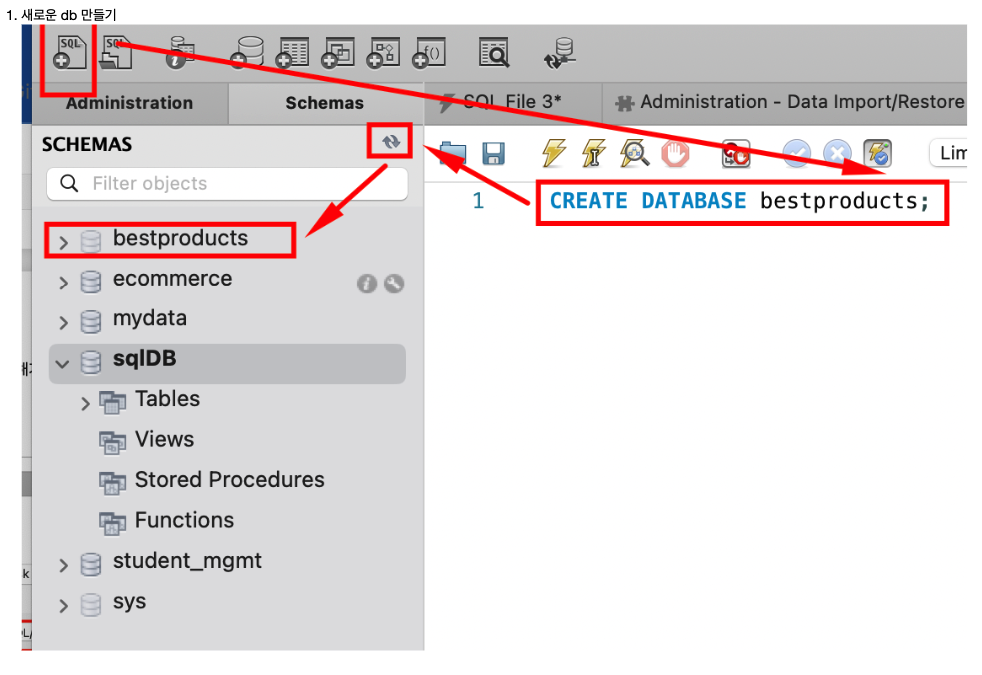
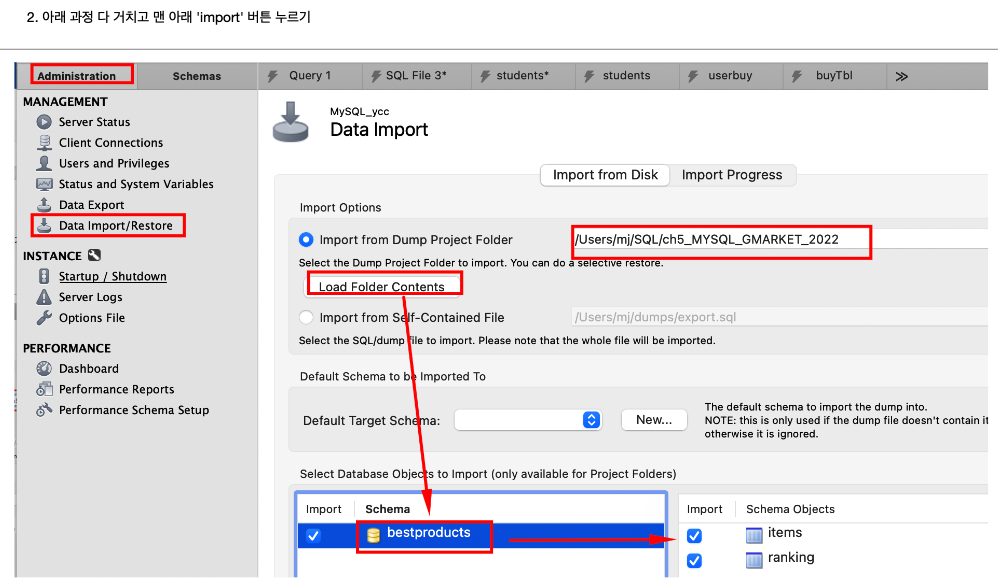
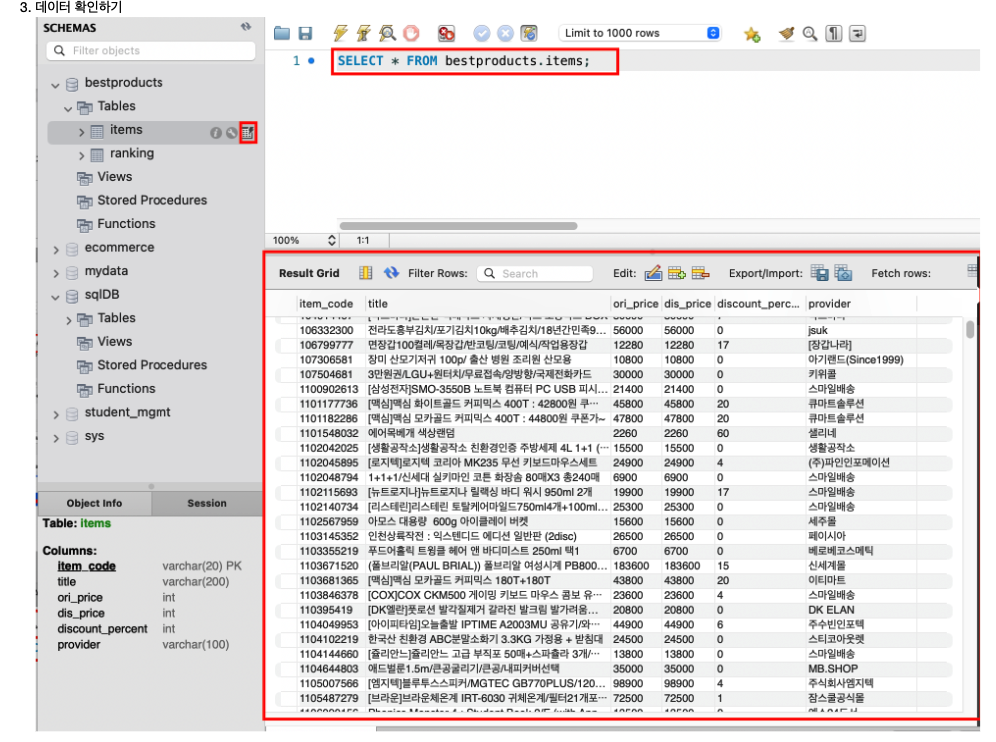